In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import accuracy_score

# Q1

In [2]:
df = pd.read_csv("../data/05/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

The target is balanced

In [6]:
sum(df.select_dtypes(include="object").columns)

0

No categorical columns

In [7]:
df.duplicated().sum()

np.int64(723)

Cannot drop duplicates, too many duplicate rows

Feature scaling not required, because tree models dont need scaling

In [8]:
X = df.drop("target", axis=1)
y = df["target"]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

We use validation set for tuning of the model. We might do feature selection and then see whether the performance improves

In [9]:
rfg = RandomForestRegressor(random_state=42)
rfg.fit(X_train, y_train)

train_score = rfg.score(X_train, y_train)  
valid_score = rfg.score(X_valid, y_valid) 

y_pred = rfg.predict(X_test)
test_score = r2_score(y_test, y_pred)

print(f"Train R²: {train_score:.3f}")
print(f"Validation R²: {valid_score:.3f}")
print(f"Test R²: {test_score:.3f}")

Train R²: 0.981
Validation R²: 0.922
Test R²: 0.877


In [10]:
adg = AdaBoostRegressor(random_state=42)
adg.fit(X_train, y_train)

train_score = adg.score(X_train, y_train)  
valid_score = adg.score(X_valid, y_valid) 

y_pred = adg.predict(X_test)
test_score = r2_score(y_test, y_pred)

print(f"Train R²: {train_score:.3f}")
print(f"Validation R²: {valid_score:.3f}")
print(f"Test R²: {test_score:.3f}")

Train R²: 0.511
Validation R²: 0.501
Test R²: 0.433


In [11]:
xgbr = XGBRegressor(random_state=42)
xgbr.fit(X_train, y_train)

train_score = xgbr.score(X_train, y_train)  
valid_score = xgbr.score(X_valid, y_valid) 

y_pred = xgbr.predict(X_test)
test_score = r2_score(y_test, y_pred)

print(f"Train R²: {train_score:.3f}")
print(f"Validation R²: {valid_score:.3f}")
print(f"Test R²: {test_score:.3f}")

Train R²: 1.000
Validation R²: 0.928
Test R²: 0.875


# Q2

In [13]:
X = df[["restecg", "oldpeak"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
xgbc = XGBClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ("rf", rf), ("xgbc", xgbc)],
    voting="hard"
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.6829268292682927


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ("rf", rf), ("xgbc", xgbc)],
    voting="soft"
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.6878048780487804


In [22]:
best_acc = 0
best_weights = None
voting_clf = None
for i in range(20):
    weights = np.random.randint(1, 6, size=4).tolist()

    voting_clf = VotingClassifier(
        estimators=[('dt', dt), ('knn', knn), ("rf", rf), ("xgbc", xgbc)],
        voting="soft",
        weights=weights
    )

    voting_clf.fit(X_train, y_train)
    y_pred = voting_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc = acc
        best_weights = weights

print("Best Accuracy: ", best_acc)
print("Best Weights: ", best_weights)

Best Accuracy:  0.6878048780487804
Best Weights:  [1, 1, 3, 2]


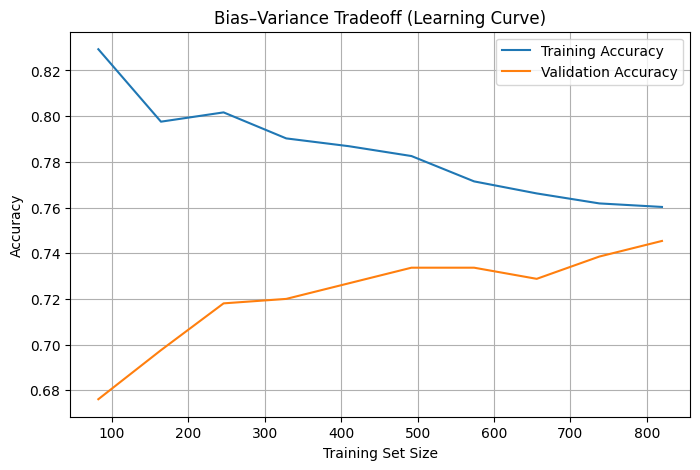

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    voting_clf, X, y, cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")
plt.title('Bias-Variance Tradeoff (Learning Curve)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Q3

In [26]:
rf = RandomForestClassifier(random_state=42)
adb = AdaBoostClassifier(random_state=42)
xgbc = XGBClassifier()

rf.fit(X_train, y_train)
adb.fit(X_train, y_train)
xgbc.fit(X_train, y_train)

rf_train_acc = rf.score(X_train, y_train)
rf_test_acc = rf.score(X_test, y_test)

xgbc_train_acc = xgbc.score(X_train, y_train)
xgbc_test_acc = xgbc.score(X_test, y_test)

print(f"Random Forest: Train={rf_train_acc:.3f}, Test={rf_test_acc:.3f}")
print(f"XGBoost: Train={xgbc_train_acc:.3f}, Test={xgbc_test_acc:.3f}")

Random Forest: Train=0.773, Test=0.688
XGBoost: Train=0.771, Test=0.683


In [27]:
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('adb', adb)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

voting_train_acc = voting_clf.score(X_train, y_train)
voting_test_acc = voting_clf.score(X_test, y_test)

print(f"Voting Ensemble: Train={voting_train_acc:.3f}, Test={voting_test_acc:.3f}")

Voting Ensemble: Train=0.773, Test=0.688


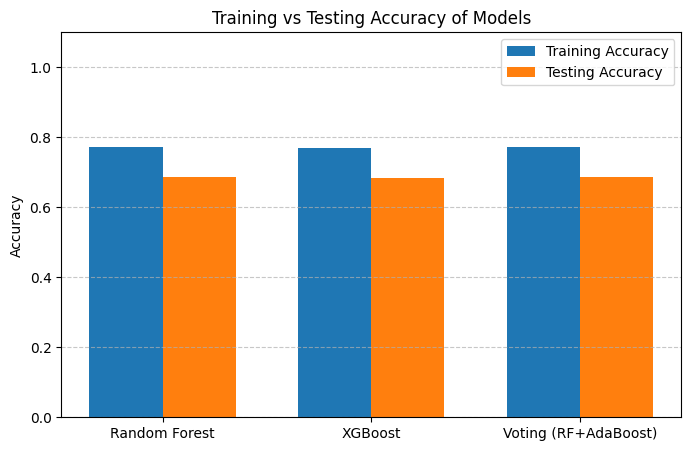

In [30]:
models = ['Random Forest', 'XGBoost', 'Voting (RF+AdaBoost)']
train_acc = [rf_train_acc, xgbc_train_acc, voting_train_acc]
test_acc = [rf_test_acc, xgbc_test_acc, voting_test_acc]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, train_acc, width, label='Training Accuracy')
plt.bar(x + width/2, test_acc, width, label='Testing Accuracy')

plt.xticks(x, models)
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy of Models')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
